<a href="https://colab.research.google.com/github/NancyKamalVachhani/Machine-Learning/blob/master/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [7]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_reward1= [0] * d
numbers_of_reward2= [0] * d
total_reward = 0
for n in range(0,N):
  ads = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_reward1[i]+1,numbers_of_reward2[i]+1)
    if random_beta>max_random:
      max_random = random_beta
      ads = i
  ads_selected.append(ads)
  reward = dataset.values[n,ads]
  if reward == 1:
    numbers_of_reward1[ads]+=1
  else:
    numbers_of_reward2[ads]+=1  
  total_reward+=reward

## Visualising the results - Histogram

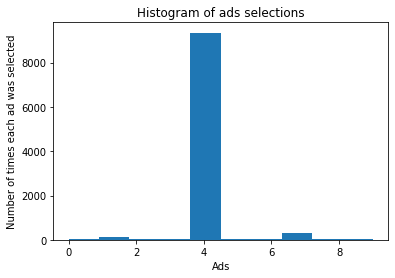

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()